#### Define Meta-Parameters
##### Meta-Parameters

In [325]:
N_Reconfigurations = 10**1
d = 1 # Dimension of X
D = 1 # Dimension of Y

# Data Meta-Parameters
noise_level = 0.1
uncertainty_level= 0.9

# Training meta-parameters
Epochs = 10**1

##### Simulation Meta-Parameters

In [326]:
# Number of Datapoints
N_data = 10**3
# Unknown Function
def unknown_f(x):
    return np.sin(x)

#### Generate Data

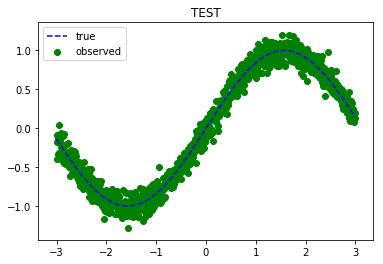

In [327]:
%run Data_Generator.ipynb # Exectute temporary training Parameters

#### Define NEU-OLS

In [328]:
%run NEU_Backend.ipynb

TensorFlow: 2.1.0
Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
reconfiguration_unit_1009 (R (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_1010 (R (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_1011 (R (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_1012 (R (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_1013 (R (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_1014 (R (None, 2)  

### Compile NEU_OLS

In [329]:
NEU_OLS.compile(loss=keras_NEU_OLS_loss,
                optimizer="SGD",
                metrics=['mae', 'mse'])

### Fit NEU OLS

In [330]:
history = NEU_OLS.fit(
  data_NEU, data_y,
  epochs=Epochs)

Epoch 1/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 2/10
1000/1000 [==============================] - 0s 322us/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 3/10
1000/1000 [==============================] - 0s 318us/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 4/10
1000/1000 [==============================] - 0s 317us/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 5/10
1000/1000 [==============================] - 0s 315us/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 6/10
1000/1000 [==============================] - 0s 307us/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 7/10
1000/1000 [==============================] - 0s 307us/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 8/10
1000/1000 [==============================] - 0s 311us/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Ep

In [355]:
NEU_prediction2 = NEU_OLS.predict(data_NEU)

### Evaluate Benchmark Regression Models

In [353]:
%run Regression_Benchmark_Models.ipynb

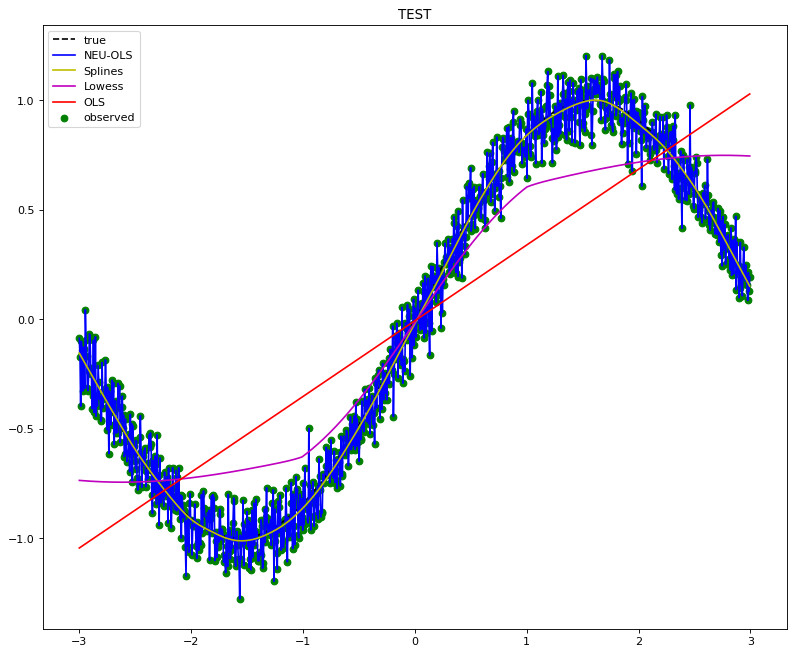

In [356]:
import matplotlib.pyplot as plt
# Adjust Figure Details
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# Plot Models
plt.plot(data_x,true_y,color='k',label='true',linestyle='--')
plt.plot(data_x,NEU_prediction,color='b',label='NEU-OLS')
plt.plot(data_x,f_hat_smoothing_splines,color='y',label='Splines')
plt.plot(data_x,f_hat_lowess,color='m',label='Lowess')
plt.plot(data_x,model_pred_y,color='r',label='OLS')

# Add Legends
plt.scatter(data_x,data_y,color='g',label='observed')
plt.legend(loc="upper left")
plt.title("TEST")
plt.show()